# Relación de los patrones SOLID y los principios de programación orientada a objetos
<a href="https://juanfonsecasolis.github.io/">Juan M. Fonseca-Solís</a> · March/April 2025 · 10 min read

---

## Introducción
En la metodología de trabajo SCRUM, el equipo de desarrollo de software incorpora funcionalidad nueva al sistema de forma incremental (cada dos semanas, por ejemplo) que posteriormente el equipo de pruebas y el cliente evalua para determinar si los requerimientos fueron satisfechos correctamente. Durante este proceso, los cambios realizados pueden afectar la funcionalidad pre-existente, por lo que es necesario correr pruebas de regresión, es decir, repetir las pruebas realizadas en las iteraciones pasadas. Como la ejecución de estas pruebas resulta costozo, se recurre a la automatización; sin embargo, puede ocurrir también que los scripts de automatización pasados dejen de funcionar, entre otras razones, por un mal diseño de los mismos. Para evitar esto se utilizan cuatro patrones de diseño, llamados "SOLID", que permiten que lograr que la solución de pruebas sea mantenible y escalable en el tiempo, procurando una "alta cohesión y bajo acoplamiento" entre sus componentes (GRASP) [1, 2]. El acrónimo SOLID se define como sigue:

* S - Responsabilidad única (_single responsibility_).
* O - Abierto-cerrado (_Open-closed_).
* L - Sustitución de Liskov (_Liskov substitution_).
* I - Segregación de la interfaz (_Interface segregation_).
* D - Inversión de la dependencia (_Dependency inversion_).

Estos cuatro patrones de diseño ya son ampliamente explicados en la literatura y en este ipython notebook no pretendemos hacer lo mismo, sino que más bien nos enfocamos en describir su relación con los cuatro principios básicos de programación orientada a objetos (OOP, por sus siglas en inglés): polimorfismo, abstracción, encapsulamiento y herencia; pues ambos conceptos suelen confundirse.

## Responsabilidad única (encapsulamiento)
En este diseño cada componente de software (clase o método) desempeña o "encapsula" una sola tarea, lo que permite reemplazarlo sin tener que modificar otros archivos de código. Este diseño también está relacionado con el diseño de segregación de la interfaz.

In [1]:
from abc import ABC, abstractmethod

class Funcion(ABC):
    
    def __init__(self):
        pass
    
    @abstractmethod
    def evaluar(self, x:float):
        pass
    
    def evaluarArreglo(self, arreglo:list):
        return [self.evaluar(x) for x in arreglo]

## Abierto-cerrado (polimorfismo)
En el diseño abierto-cerrado los componente de software están abiertos para extender su funcionalidad pero cerrados para su modificarla; esto se cumple en el principio de polimorfismo, donde la funcionalidad de una clase padre (por ejemplo, TestBase o PageBase) se escribe una sola vez y son las clases hijas las encargadas de agregar  funcionalidad, por ejemplo, atributos y métodos nuevos o la implementación de métodos abstractos.

In [2]:
class Lineal(Funcion):
    
    def __init__(self, m:float, b:float):
        super()
        self.m = m
        self.b = b
    
    def evaluar(self, x:float):
        return self.m*x+self.b
    
class Cuadratica(Funcion):
    
    def __init__(self, a:float, b:float, c:float):
        super()
        self.a = a
        self.b = b
        self.c = c
    
    def evaluar(self, x:float):
        return self.a*x**2+self.b*x+self.c

## Sustitución de Liskov (herencia)
En este diseño los atributos y métodos de la clase padre también están presentes en sus clases hijas, y pueden ser invocados sin necesidad de realizar conversión explícita de datos; lo que se relaciona al principio de herencia.

In [3]:
funcionLineal = Lineal(1, 0)
funcionCuadratica = Cuadratica(1, 2, 3)
x = [0, 0.5, 1.0, 2.0, 4.0]

print(funcionLineal.evaluarArreglo(x))
print(funcionCuadratica.evaluarArreglo(x))

[0, 0.5, 1.0, 2.0, 4.0]
[3, 4.25, 6.0, 11.0, 27.0]


## Segregación de la interfaz (encapsulamiento)

En el diseño de segregación de la interfaz los componentes implementan roles documentados o "encapsulados" en una interfaz (por ejemplo, ejecutar operaciones de lectura, escritura y borrado en un repositorio). Es mejor tener "muchas interfaces de cliente específicas que una interfaz de propósito general).

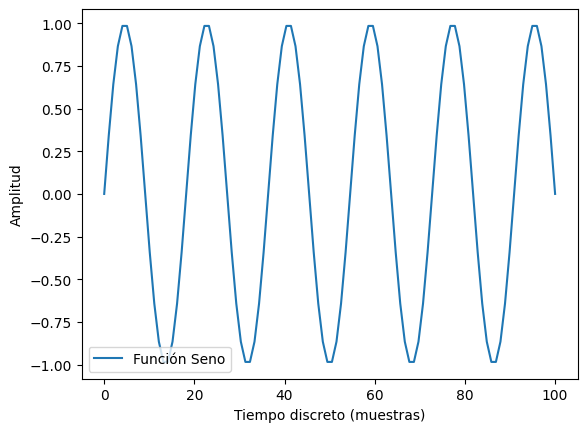

In [4]:
import matplotlib.pylab as plt
import numpy as np

class Graficadora(ABC):
    
    def __init__(self):
        pass
    
    def graficar(self, arregloX:list, arregloY:list):
        plt.plot(arregloX, arregloY, label='Función Seno')
        plt.xlabel('Tiempo discreto (muestras)')
        plt.ylabel('Amplitud')
        plt.legend()

# en Python no existen las interfaces, pero se puede emular usando herencia múltiple
class Seno(Funcion, Graficadora):
    
    def __init__(self, Fs:float, F0:float):
        super()
        self.Fs = Fs
        self.F0 = F0
        
    def evaluar(self, x:float):
        return np.sin(2*np.pi*self.F0/self.Fs*x)
    
funcionSeno = Seno(8000, 440)
x = np.linspace(0,100,100)
funcionSeno.graficar(x, funcionSeno.evaluarArreglo(x))

##  Inversión de la dependencia (abstracción)
Este diseño propone que "se debe depender de abstracciones, no de implementaciones", es decir, que primero surge la necesidad de invocar un componente "subordinado" desde un componente "maestro", y luego se crea la implementación de componente subordinado.  

In [5]:
# funcionSeno.reproducirAudio(funcionSeno.evaluarArreglo(x))

class Reproductor(ABC):
    
    def __init__(self):
        pass
    
    def reproducirAudio(self):
        # TODO: primero se crea la abstracción de la firma método (retorno, nombre y paramámetros)
        # y luego se crea la implementación. Para la implementación se puede usar más adelante 
        # la librería IPython.display.Audio y la función Audio(y, rate=Fs), luego se hace que la clase Seno
        # derive de la clase Reproductor.
        pass

## Conclusiones
Los patrones de diseño resumidos en el acrónimo SOLID se relacionan con los principios de programación orientada a objetos. Responsabilidad-única y segregación de la interfaz se relacionan al principio de encapsulamiento, pues las funciones se encapsulan en clases e interfaces. El diseño abierto-cerrado se relaciona con el principio de polimorfismo, pues son las clases hijas las que extienden la funcionalidad de las clases padres. El diseño de sustitución de Liskov está ligado al de herencia, pues la clase hija hereda de la clase padre y puede usar sus mismos atributos y métodos. Finalmente, el diseño de inversión de la dependencia se relaciona al principio de abstracción, pues primero se piensa en la función que debe desempeñar un componente subordinado y luego en la implementación para lograrlo.

## Referencias
1. SOLID. (2024, 9 de enero). Wikipedia, La enciclopedia libre. Fecha de consulta: 13:10, enero 9, 2024 desde https://es.wikipedia.org/w/index.php?title=SOLID&oldid=156873545.
2. GRASP. (2024, 7 de diciembre). Wikipedia, La enciclopedia libre. Fecha de consulta: 15:17, diciembre 7, 2024 desde https://es.wikipedia.org/w/index.php?title=GRASP&oldid=163990059.
3. Anton Angelov. Automated Testing Unleashed : Automated Testing Engineering Fundamentals: The Complete Handbook Volume 1. Automate the Planet.

---
<a rel="license" href="http://creativecommons.org/licenses/by-nd/4.0/"><img alt="licencia Creative Commons" style="border-width:0" src="../img/80x15_by-nd.png" /></a><p style="text-align: center;"> This work is under a <a rel="license" href="http://creativecommons.org/licenses/by-nd/4.0/">Creative Commons Atribución 4.0 Internacional license</a>. The website <a href="https://juanfonsecasolis.github.io/">juanfonsecasolis.github.io</a> It is a Costa Rican blog dedicated to independent research on issues related to my computer science and math. To reuse this article and cite the source you can use Bibtex:</p>
```
@online{Fonseca2025,
  author = {Juan M. Fonseca-Solís},
  title = { Principios SOLID },
  year = 2025,
  url = {https://juanfonsecasolis.github.io/blog/JFonseca.solid.html},
  urldate = {}
}
```